In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter

#sns.set(style='white', context='notebook', palette='deep')

In [2]:
df=pd.read_csv('adult.csv')
df = df[df.occupation != '?']
raw_data = df[df.occupation != '?']

In [3]:
#data frame's shape
print(df.shape)

(30718, 15)


In [4]:
def cc(x):
    return sum (x== '?')
df.apply(cc)

age                 0
workclass           0
fnlwgt              0
education           0
education.num       0
marital.status      0
occupation          0
relationship        0
race                0
sex                 0
capital.gain        0
capital.loss        0
hours.per.week      0
native.country    556
income              0
dtype: int64

In [5]:
#df=df.fillna(np.nan)
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [6]:
df.head(2)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K


In [7]:
df['income']=df['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})

In [8]:
df.head(2)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0


In [9]:
#General Distribution about 'income'

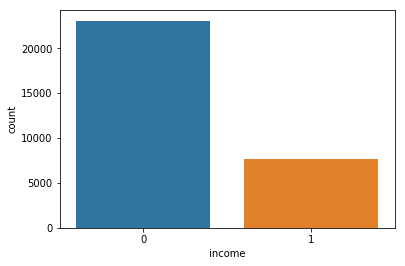

In [10]:
data=df['income']
sns.countplot(data, label='Count')
plt.show()
# 0: income less than 50k
#1: income greater than 50K

In [11]:
#income compare between females and males

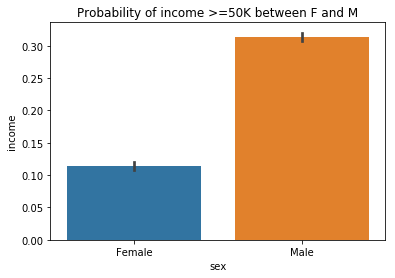

In [12]:
sex=df['sex']
income=df['income']
p=sns.barplot(x=sex, y=income)
p.set_title('Probability of income >=50K between F and M')
plt.show()

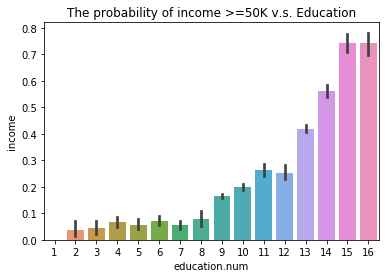

In [13]:
# Replationship between Eduation and income
education=df['education.num']
income=df['income']
p=sns.barplot(x=education, y=income)
p.set_title('The probability of income >=50K v.s. Education')
plt.show()


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


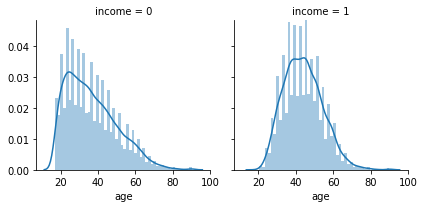

In [14]:
#Age v.s. Income
g2=sns.FacetGrid(df, col='income')
g2.map(sns.distplot, "age")
plt.show()

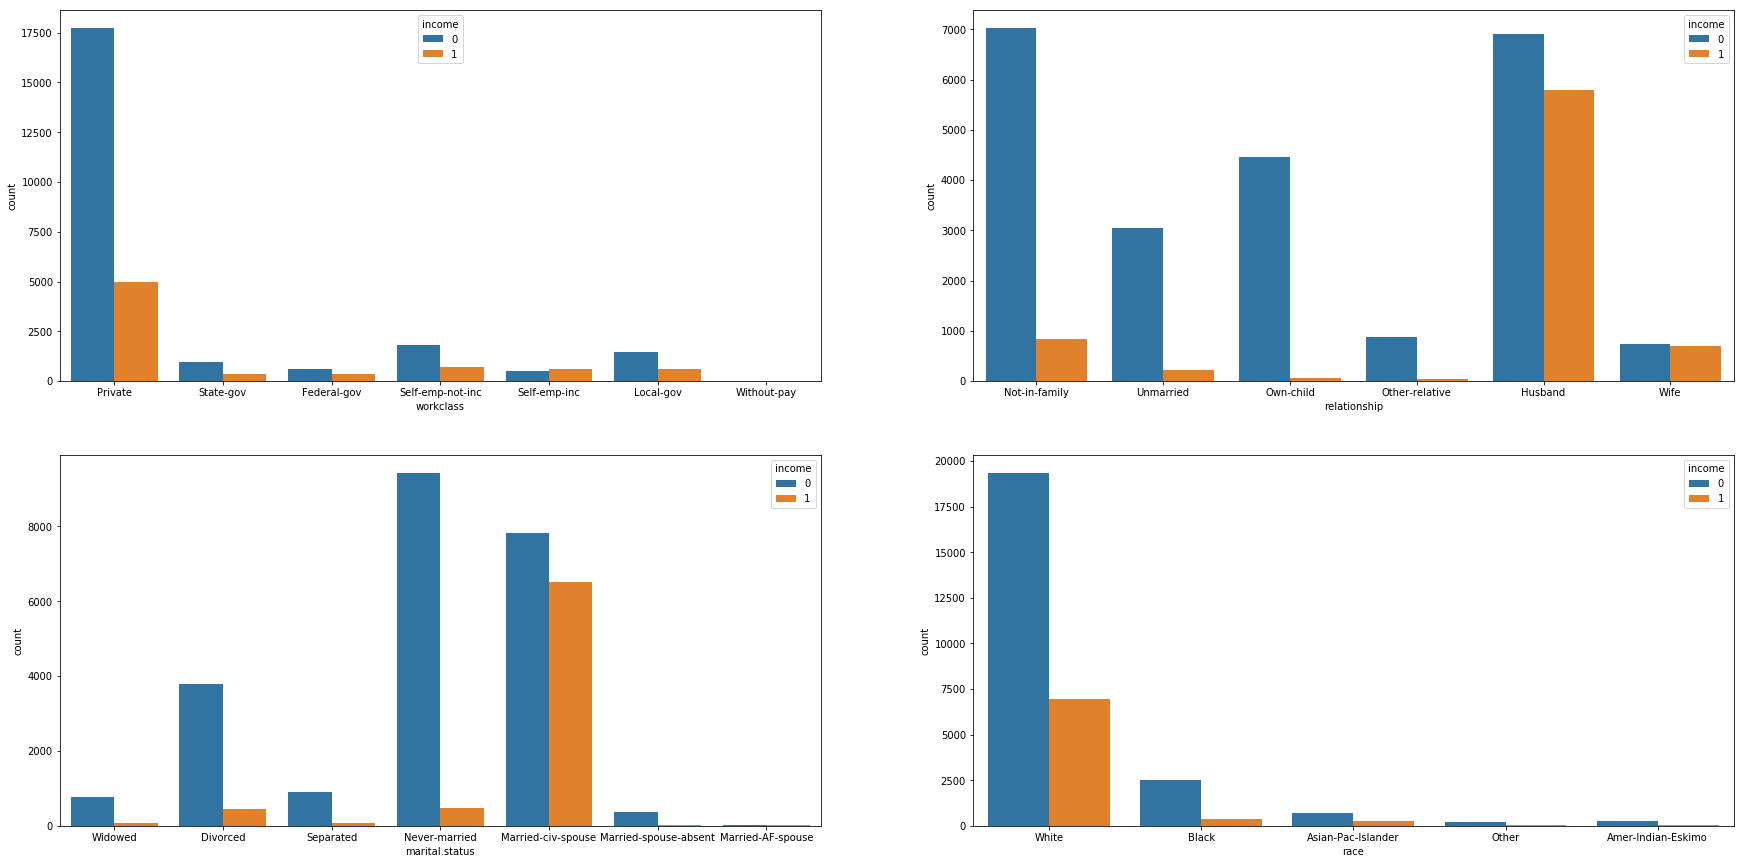

In [15]:
fig, ((a,b),(c,d))= plt.subplots(2,2,figsize=(30,15))

sns.countplot(df['workclass'],hue=df['income'],ax=a)
sns.countplot(df['relationship'],hue=df['income'],ax=b)
sns.countplot(df['marital.status'],hue=df['income'],ax=c)
sns.countplot(df['race'],hue=df['income'],ax=d)


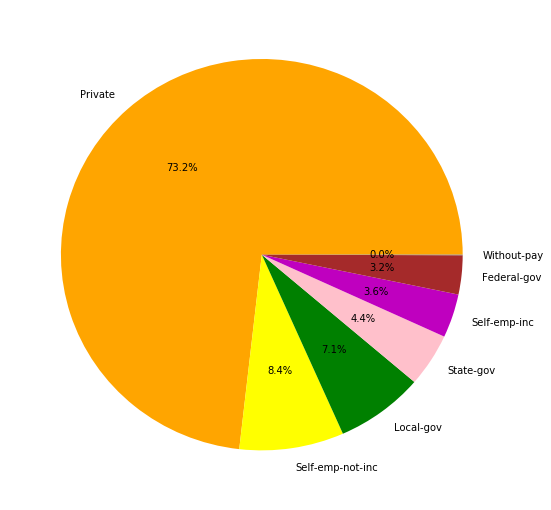

In [16]:
df_us=df[df["native.country"]=="United-States"].workclass
df_us.value_counts()
labels=df_us.value_counts().index
sizes= df_us.value_counts().values
colors=["orange","yellow","green","pink","m","brown","grey"]
explode=[0,0,0,0,0,0,0]
plt.figure(figsize=(9,9))
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%')
plt.show()
